In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

/home/kevinteng/anaconda3/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kevinteng/anaconda3/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kevinteng/anaconda3/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/kevinteng/anaconda3/lib/python3.6/site-package

Create a (10,10) binary image with (2,2) label in the center

(20, 20)


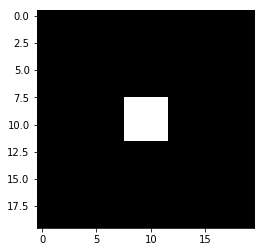

In [39]:
gt_one = tf.ones([4,4], dtype = tf.float32)
padding = tf.constant([[8, 8,], [8, 8]])
gt = tf.pad(gt_one , padding, "CONSTANT")
plt.imshow(gt, cmap = 'gray')
print(gt.shape)

(20, 20)


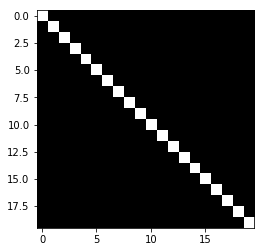

In [38]:
p = tf.eye(20, dtype = tf.float32)
# padding = tf.constant([[3, 3,], [3, 3]])
# p = tf.pad(p_one , padding, "CONSTANT")
# p = tf.keras.layers.Conv2D(1,2,padding='same')(p[tf.newaxis,:,:,tf.newaxis])
# p = tf.math.abs(p)
plt.imshow(tf.squeeze(p), cmap = 'gray')
print(p.shape)

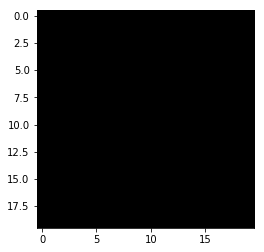

In [40]:
p_zero = tf.zeros([20,20], dtype = tf.float32)
plt.imshow(p_zero, cmap = 'gray')

In [41]:
#one hot vectorize both images 
gt_one_hot = tf.keras.utils.to_categorical(gt, num_classes=2, dtype='float32')
p_one_hot = tf.keras.utils.to_categorical(p, num_classes=2, dtype='float32')
p_zero_one_hot = tf.keras.utils.to_categorical(p_zero, num_classes=2, dtype='float32')
print(gt_one_hot.shape)
print(p_one_hot.shape)
print(p_zero_one_hot.shape)

(20, 20, 2)
(20, 20, 2)
(20, 20, 2)


# Cross Entropy Loss

In [42]:
xent_loss_list = []
for i in range(2):
    xent_loss = tf.keras.losses.categorical_crossentropy(gt_one_hot[...,i], p_one_hot[...,i])
    xent_loss_list.append(np.mean(xent_loss))
print(xent_loss_list)

[67.07217, 9.670857]


In [43]:
xent_loss_list = []
for i in range(2):
    xent_loss = tf.keras.losses.categorical_crossentropy(gt_one_hot[...,i], p_zero_one_hot[...,i])
    xent_loss_list.append(np.mean(xent_loss))
print(xent_loss_list)

[57.518066, nan]
